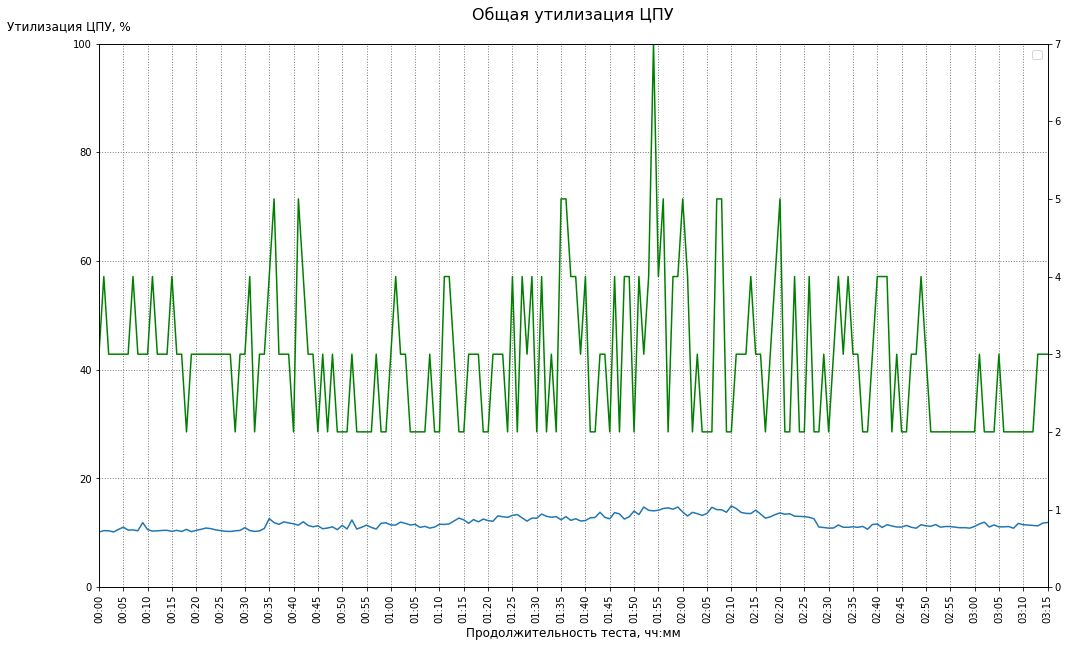

In [ ]:
def GetData(fileLocation, dataList):   
    table = 0
    header = ''
    currentHeader = []
    with open(fileLocation) as inf:
        header = inf.readline().split()
        inf.readline();
        for line in inf:
            if dataList[table] == []:
                currentLine = line.strip().split()
                del currentLine[0]
                if currentLine == currentHeader:
                    table -=1
                    dataList.remove([])
                else:
                    currentHeader = line.strip().split()
                    del currentHeader[0]
            if line != '\n':
                dataList[table].append(line.strip().split())
            else:
                dataList.append([])
                table+=1

# парсим файл в даталист для построения графиков


import datetime
import matplotlib
import matplotlib.dates as dt
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy

dataList = [[]]
timeList = []
GetData('sar_mpgu_izh.csv', dataList)
count_1 = 0
count_2 = 0
for i in dataList:
    for j in i[0]:
        if j == 'CPU':
            columnCPU = count_2
        elif j == '%idle':
            columnIdle = count_2
            tableCPU_1 = count_1
        elif j == 'runq-sz':
            columnRunq = count_2
            tableCPU_2 = count_1
        count_2 += 1
    count_1 += 1
    count_2 = 0

minTableSize = min(len(i) for i in dataList)
for i in range(len(dataList)):
    if len(dataList[i]) == minTableSize:
        firstShortestTable = i
        break
        
for i in dataList[firstShortestTable]:
    if i[0] != 'Average:':
        timeList.append(datetime.datetime.strptime(i[0], '%H:%M:%S'))
dates = dt.date2num(timeList)

startTime = timeList[0]
for i in range(len(timeList)):
    timeList[i] = datetime.datetime.min + ((timeList[i] - startTime) + datetime.timedelta(seconds=48, minutes=28))

dates = dt.date2num(timeList) - 0.02

dataCPUGrid = []
dataCPUQueueGrid = []
for i in dataList[tableCPU_1]:
    if i[columnCPU] == 'all':
        dataCPUGrid.append(100 - float(i[columnIdle]))
for i in dataList[tableCPU_2]:
    if i[columnRunq] != 'runq-sz':
        dataCPUQueueGrid.append(int(i[columnRunq]))

filter_dates = []
for i in range(len(dates)):
    if i % 5 == 0:
        filter_dates.append(dates[i])        
       
fig = plt.figure(figsize=(17,10))  
axes = fig.add_subplot(111)



axes.set_title('Общая утилизация ЦПУ\n', fontsize=16)
axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки
axes.plot(dates, dataCPUGrid)
axes.set_ylim(0,100)
axes.set_xlim(min(dates),max(dates))
axes.set_xlabel('Продолжительность теста, чч:мм', fontsize=12)
axes.set_ylabel('Утилизация ЦПУ, %', fontsize=12, position=(0, 1.02), rotation=0)
plt.xticks(filter_dates, rotation=90)
axes2 = axes.twinx()
axes2.set_ylim(0,max(dataCPUQueueGrid))
axes2.legend(['длина очереди ЦПУ'], fontsize=12)
axes2.plot(dates, dataCPUQueueGrid, 'g')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.savefig('cpu.png', format = 'png')

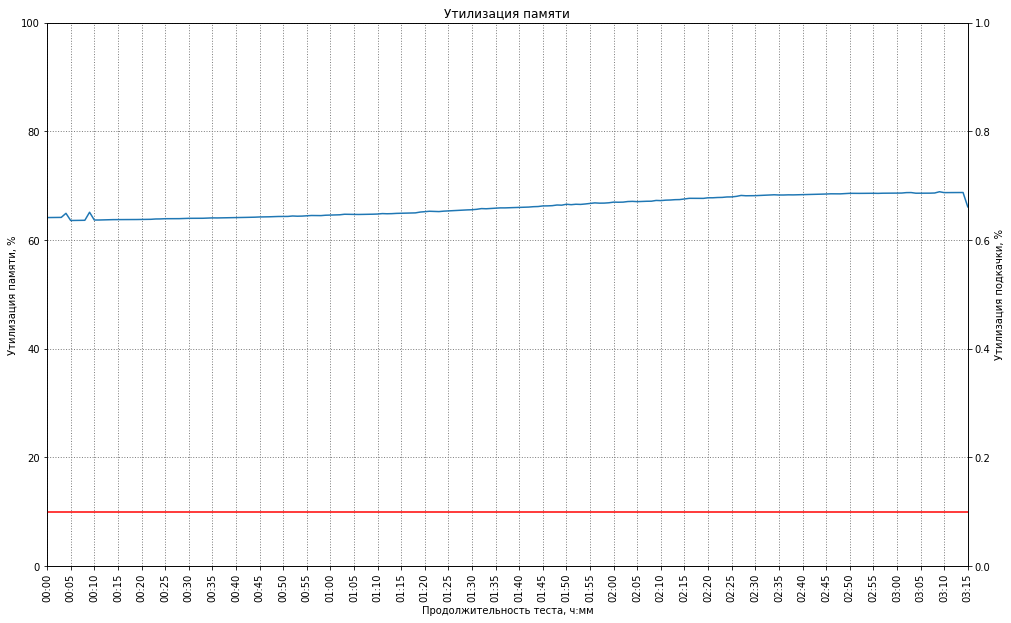

In [ ]:
count_1 = 0
count_2 = 0
for i in dataList:
    for j in i[0]:
        if j == '%memused':
            columnMem = count_2
            tableMem_1 = count_1
        elif j == '%swpused':
            columnSwp = count_2
            tableMem_2 = count_1
        count_2 += 1
    count_1 += 1
    count_2 = 0

dataMemGrid = []
dataSwpGrid = []
    
for i in dataList[tableMem_1]:
    if i[columnMem] != '%memused':
        dataMemGrid.append(float(i[columnMem]))
for i in dataList[tableMem_2]:
    if i[columnSwp] != '%swpused':
        dataSwpGrid.append(float(i[columnSwp]))

             
fig = plt.figure(figsize=(16.5,10))   
axes = fig.add_subplot(111)
axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

axes.set_title(u'Утилизация памяти')   
axes.plot(dates, dataMemGrid)
plt.xticks(filter_dates, rotation=90)
axes.set_ylim(0,100)
axes.set_xlim(min(dates),max(dates))
axes.set_xlabel(u'Продолжительность теста, ч:мм')
axes.set_ylabel(u'Утилизация памяти, %')
axes2 = axes.twinx()
axes2.set_ylim(0,1)
axes2.plot(dates, dataSwpGrid, 'r')
axes2.set_ylabel(u'Утилизация подкачки, %')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.savefig('mem.png', format = 'png')

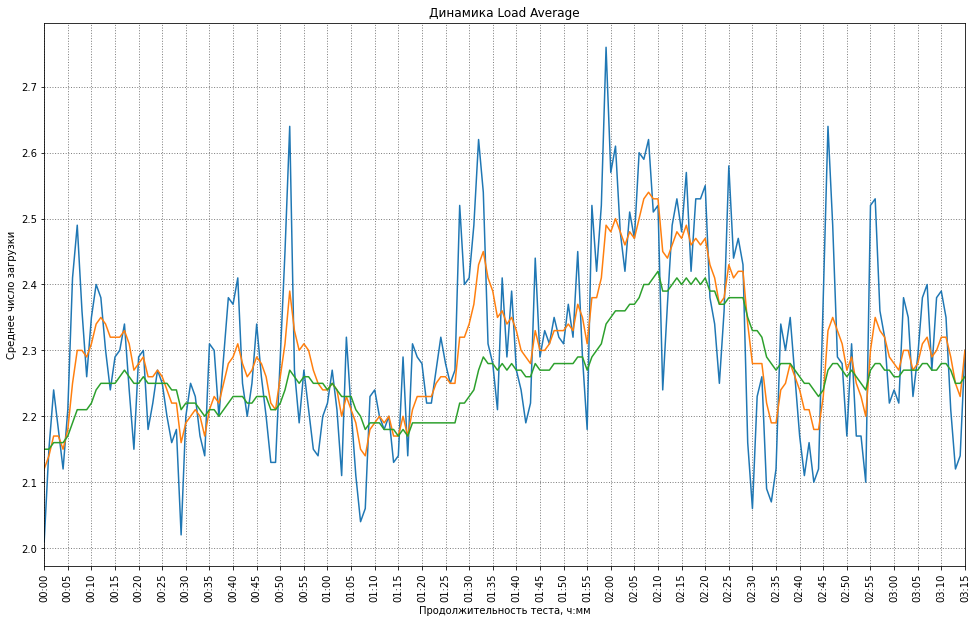

In [ ]:
count_1 = 0
count_2 = 0
for i in dataList:
    for j in i[0]:
        if j == 'ldavg-1':
            columnLdavg_1 = count_2
            tableLdavg = count_1
        elif j == 'ldavg-5':
            columnLdavg_5 = count_2
        elif j == 'ldavg-15':
            columnLdavg_15 = count_2
        count_2 += 1
    count_1 += 1
    count_2 = 0

dataLdavg1Grid = []
dataLdavg5Grid = []
dataLdavg15Grid = []
    
for i in dataList[tableLdavg]:
    if i[columnLdavg_1] != 'ldavg-1':
        dataLdavg1Grid.append(float(i[columnLdavg_1]))
    if i[columnLdavg_5] != 'ldavg-5':
        dataLdavg5Grid.append(float(i[columnLdavg_5]))
    if i[columnLdavg_15] != 'ldavg-15':
        dataLdavg15Grid.append(float(i[columnLdavg_15]))

fig = plt.figure(figsize=(16.5,10))  
axes = fig.add_subplot(111)
axes.set_title(u'Динамика Load Average')   
axes.plot(dates, dataLdavg1Grid)
axes.plot(dates, dataLdavg5Grid)
axes.plot(dates, dataLdavg15Grid)
#axes.set_ylim(0,100)
axes.set_xlim(min(dates),max(dates))
axes.set_xlabel(u'Продолжительность теста, ч:мм')
axes.set_ylabel(u'Среднее число загрузки')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.xticks(filter_dates, rotation=90)

axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

plt.savefig('loadAverage.png', format = 'png')

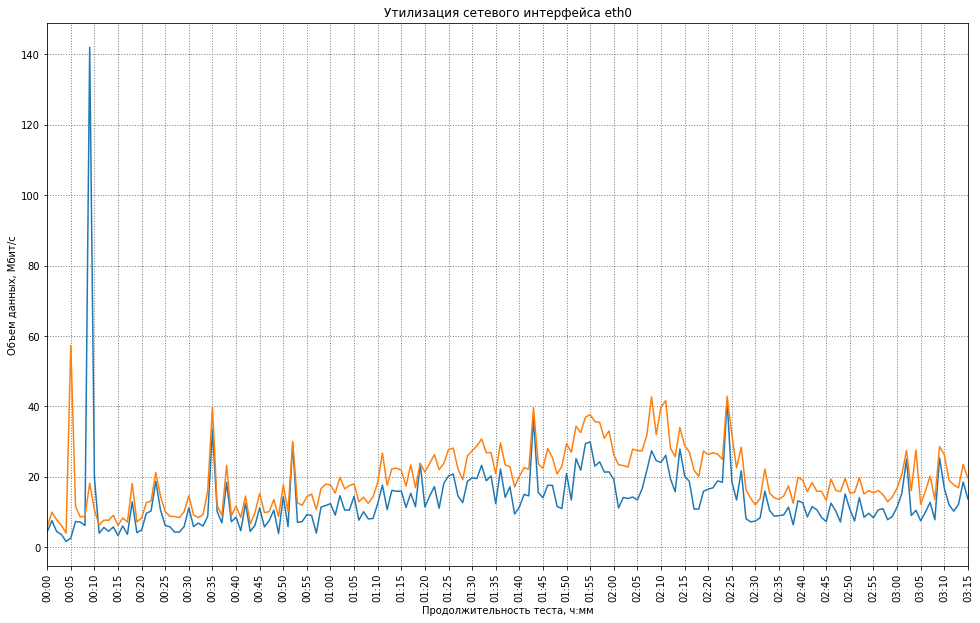

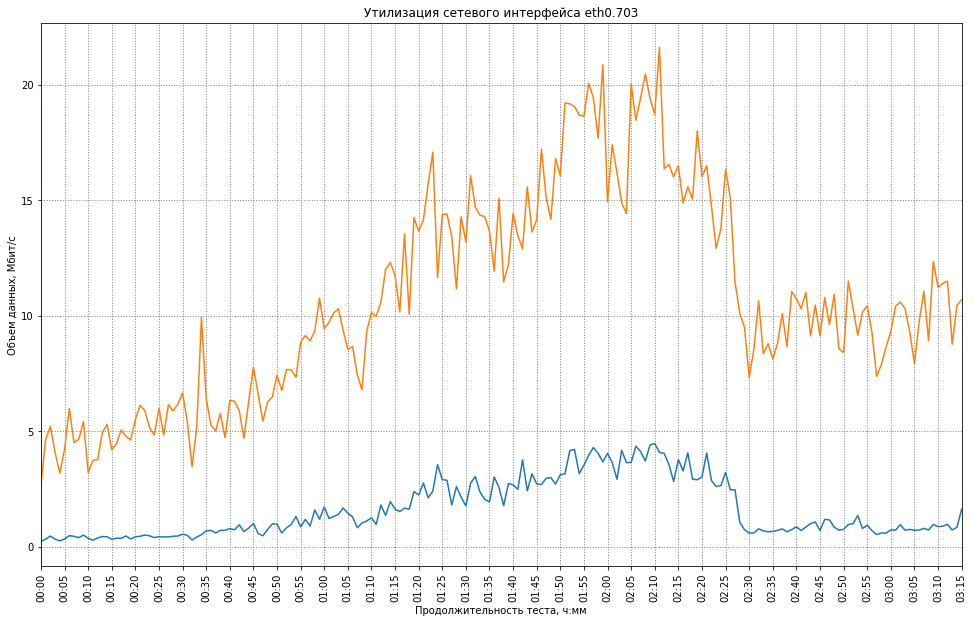

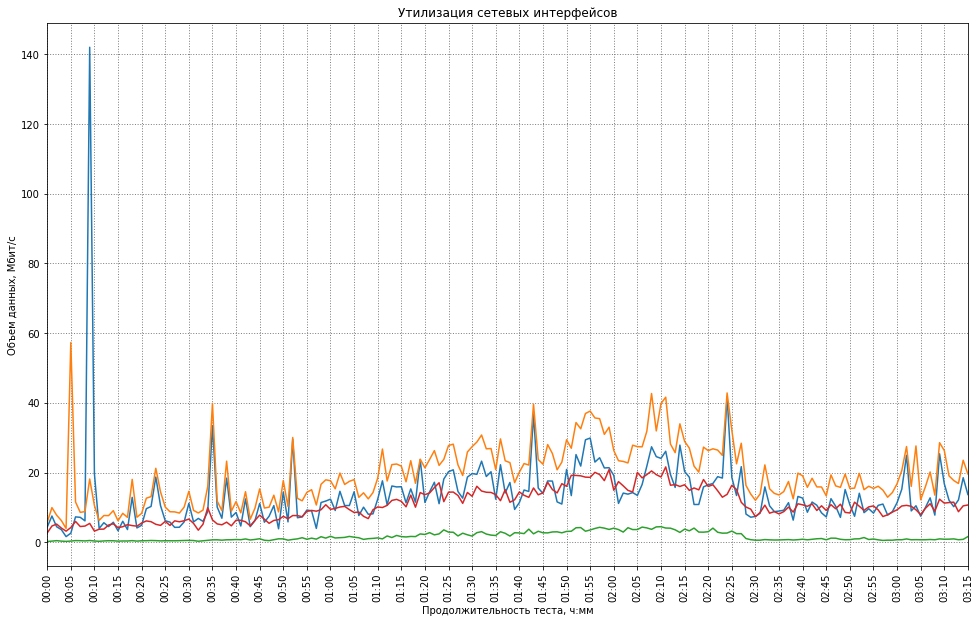

In [ ]:
count_1 = 0
count_2 = 0
for i in dataList:
    for j in i[0]:
        if j == 'rxkB/s':
            columnRecieveInterface = count_2
            tableNetwork = count_1
        elif j == 'txkB/s':
            columnTransferInterface = count_2
        count_2 += 1
    count_1 += 1
    count_2 = 0

interfaces = set()
    
count_1 = 0
for i in dataList[tableNetwork][0]:
    if i == 'IFACE':
        columnInterface = count_1
    count_1 += 1
    
for i in dataList[tableNetwork]:    
    if i[columnInterface] != 'IFACE':
        interfaces.add(i[columnInterface])


dataReceiveNetworkGrid = dict()
dataTransferNetworkGrid = dict()
for i in interfaces:
    dataReceiveNetworkGrid[i] = []
    dataTransferNetworkGrid[i] = []    
    for j in dataList[tableNetwork]:
        if j[columnInterface] == i:
            dataReceiveNetworkGrid[i].append(float(j[columnRecieveInterface])*8/1024)
            dataTransferNetworkGrid[i].append(float(j[columnTransferInterface])*8/1024)

empty_interfaces = []
for i in interfaces:
    if sum(dataReceiveNetworkGrid[i]) == 0 and sum(dataTransferNetworkGrid[i]) == 0:
        empty_interfaces.append(i)
for i in empty_interfaces:
    interfaces.remove(i)

for i in interfaces:
    fig = plt.figure(figsize=(16.5,10))  
    axes = fig.add_subplot(111)
    axes.set_title(u'Утилизация сетевого интерфейса ' + i)   
    axes.plot(dates, dataReceiveNetworkGrid[i])
    axes.plot(dates, dataTransferNetworkGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Объем данных, Мбит/c')
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

    fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
    plt.xticks(filter_dates, rotation=90)
    plt.savefig(i + '.png', format = 'png')
    
fig = plt.figure(figsize=(16.5,10))  
axes = fig.add_subplot(111)
axes.set_title(u'Утилизация сетевых интерфейсов')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.xticks(filter_dates, rotation=90)
for i in interfaces:
    axes.plot(dates, dataReceiveNetworkGrid[i])
    axes.plot(dates, dataTransferNetworkGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Объем данных, Мбит/c')
plt.savefig('network.png', format = 'png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


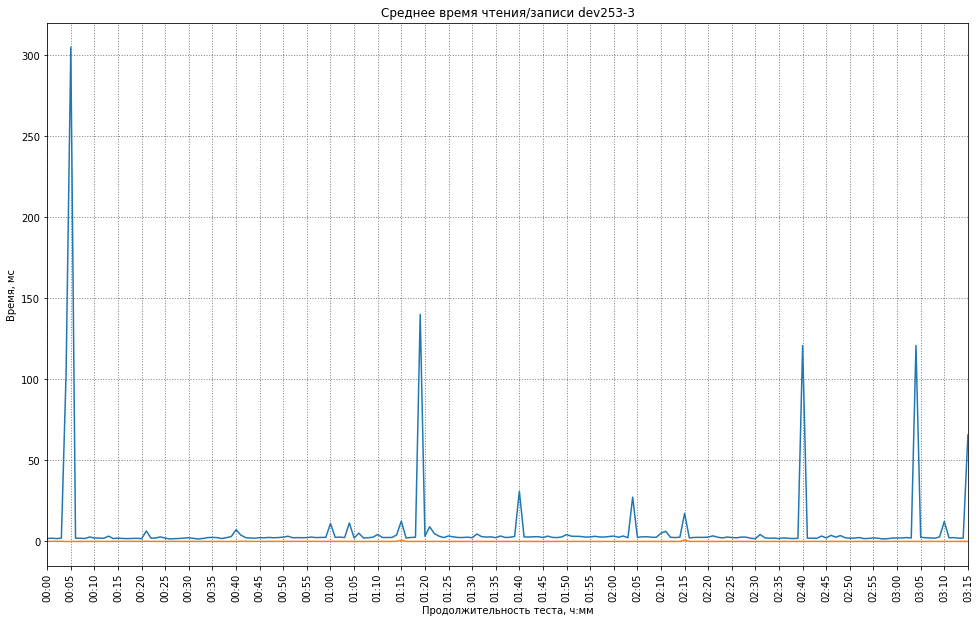

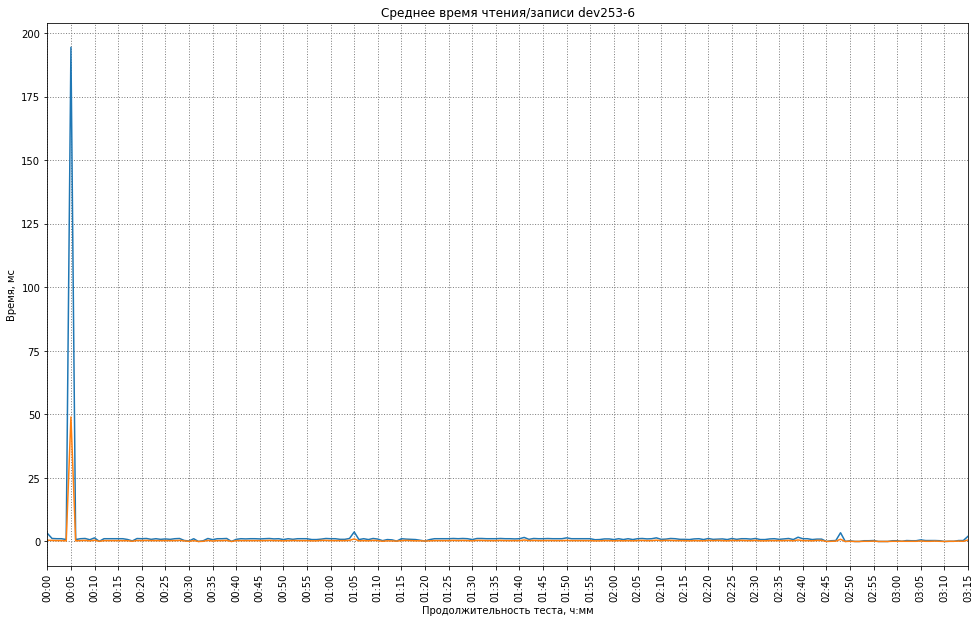

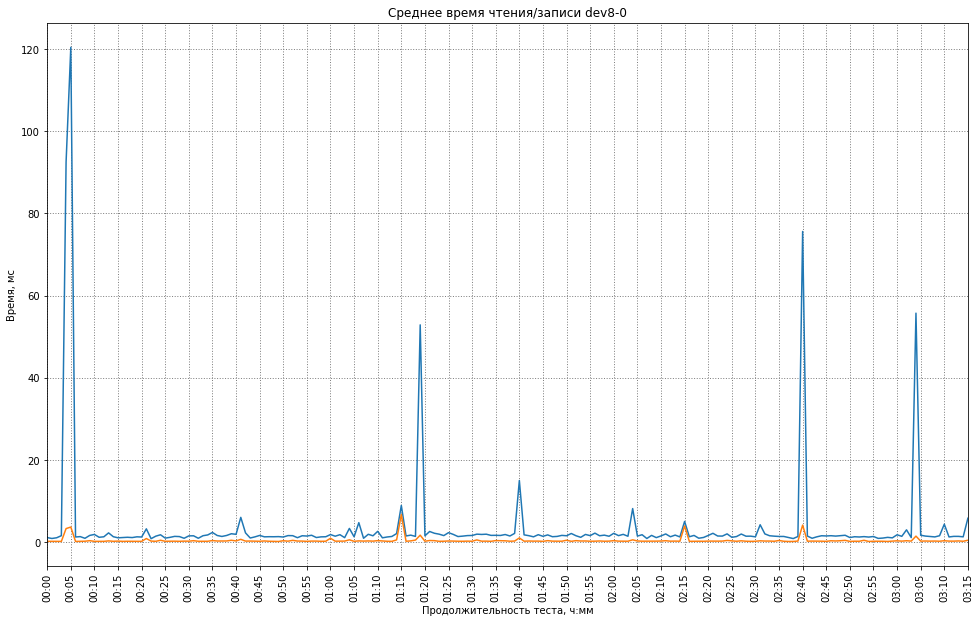

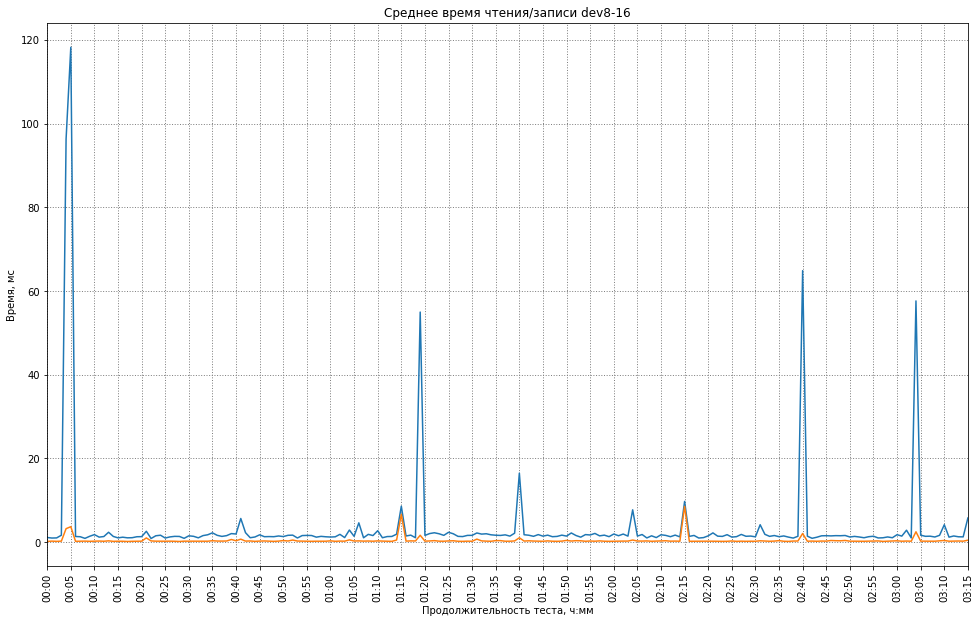

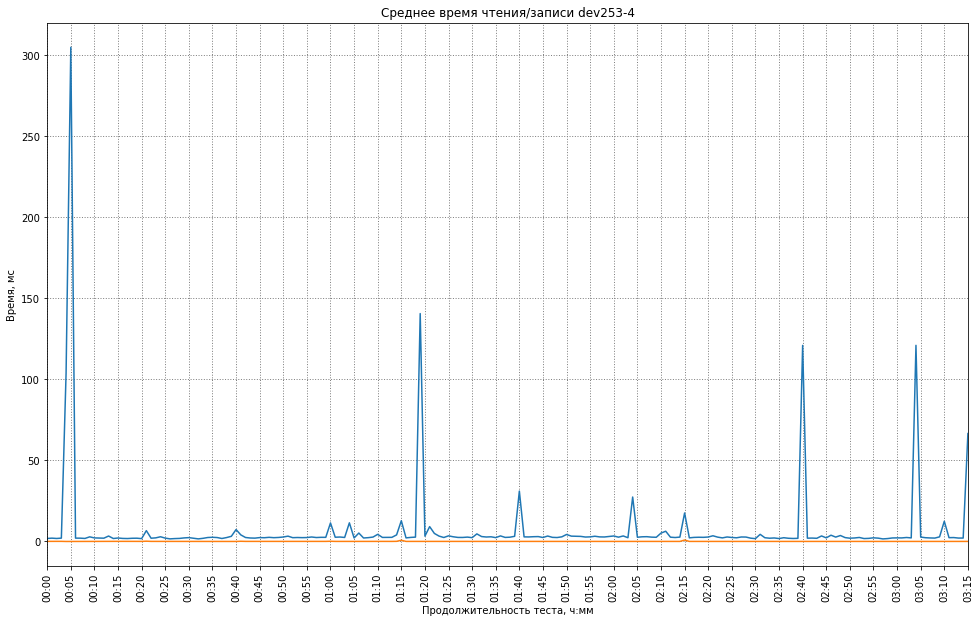

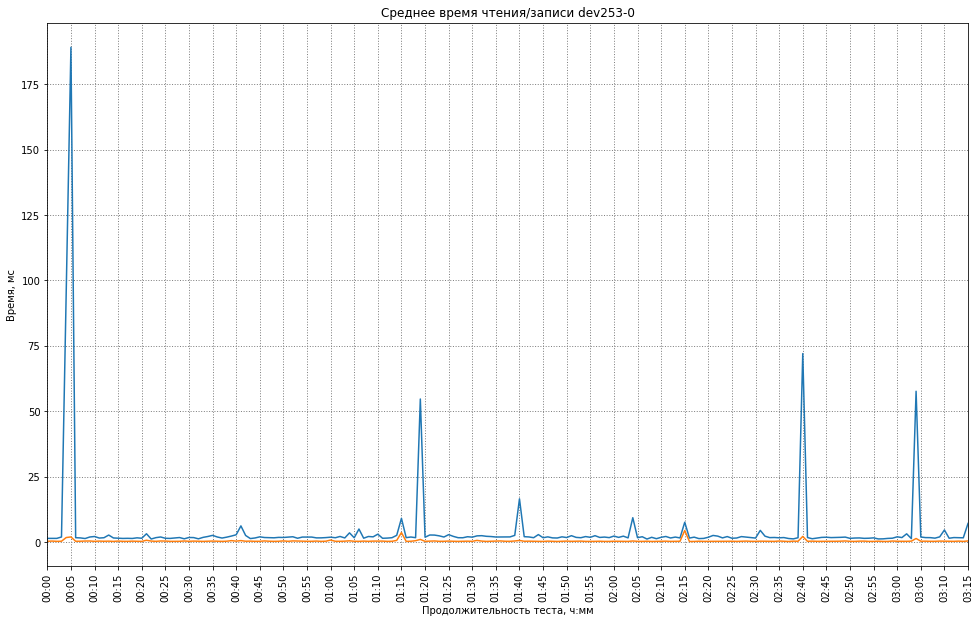

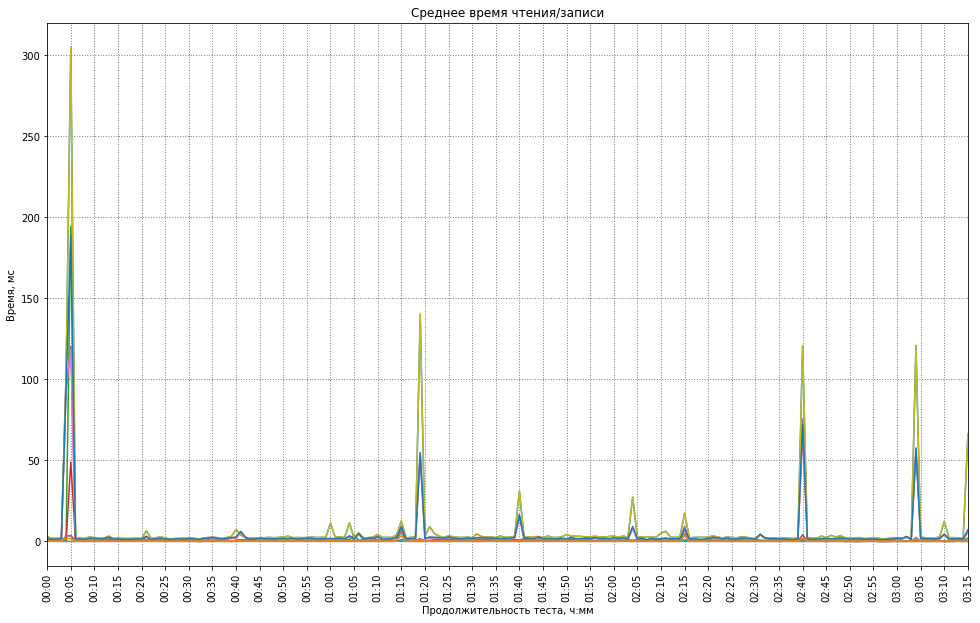

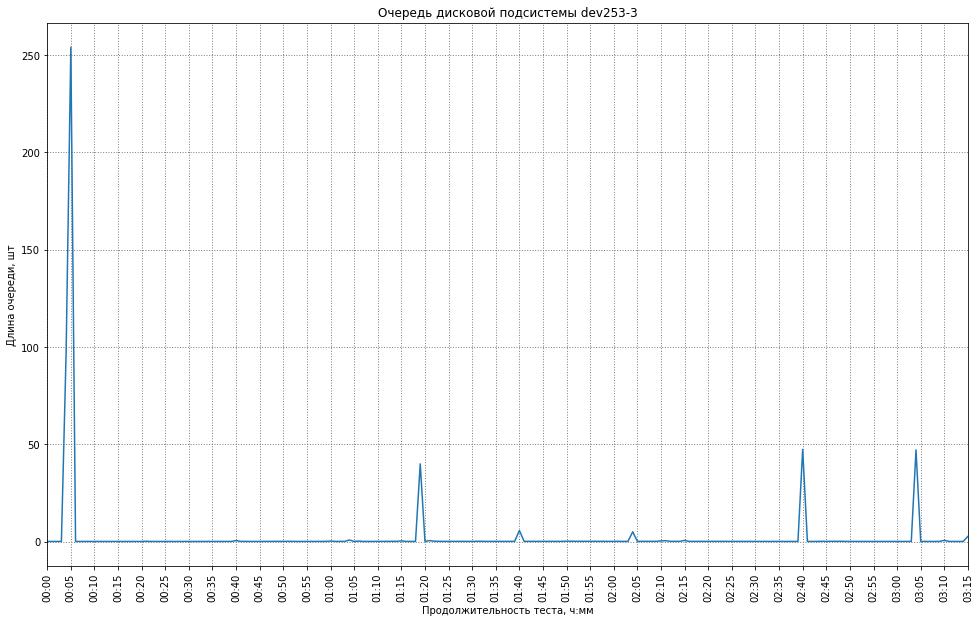

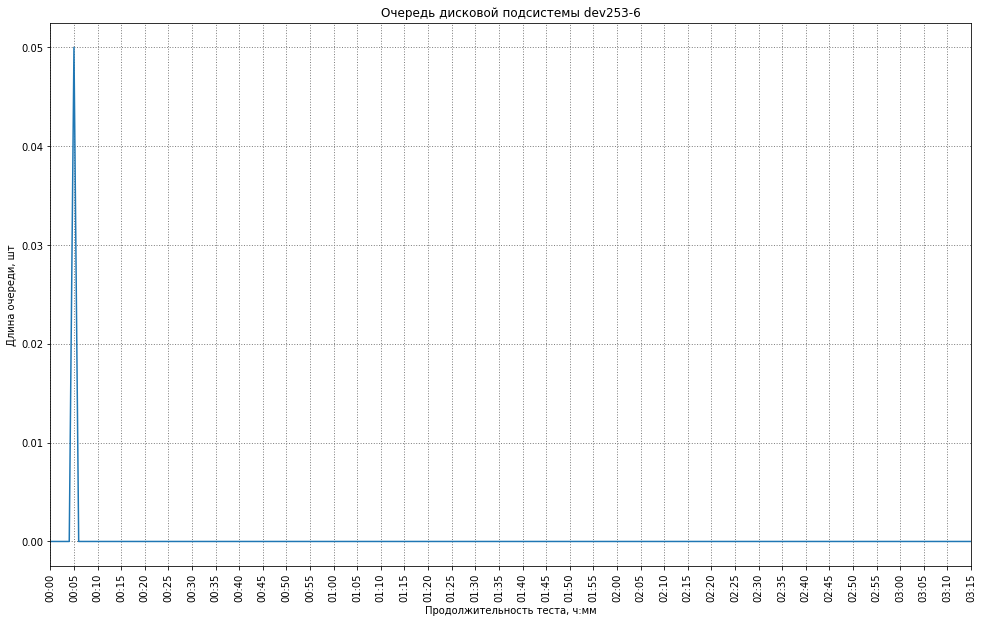

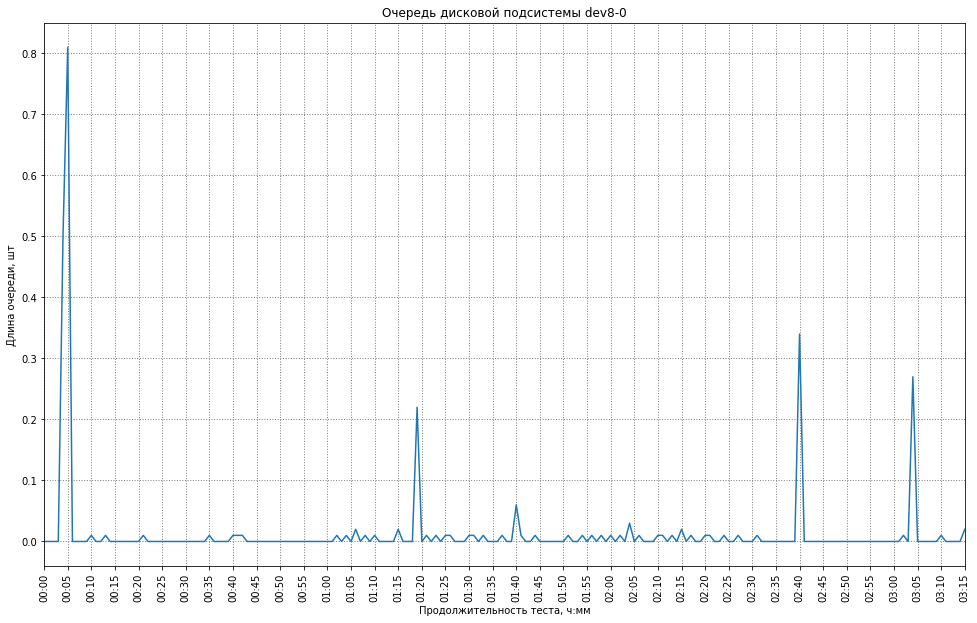

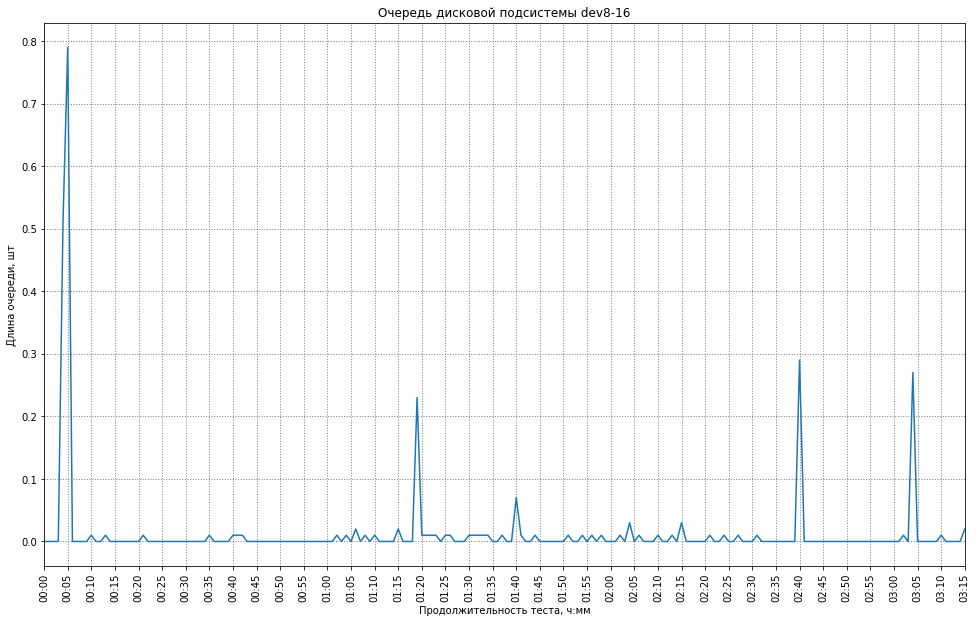

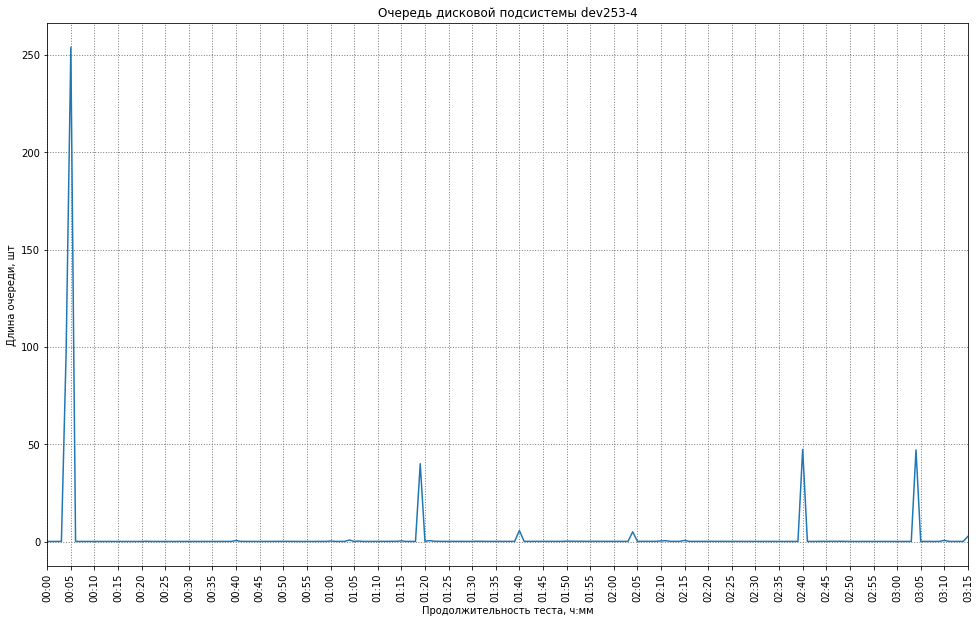

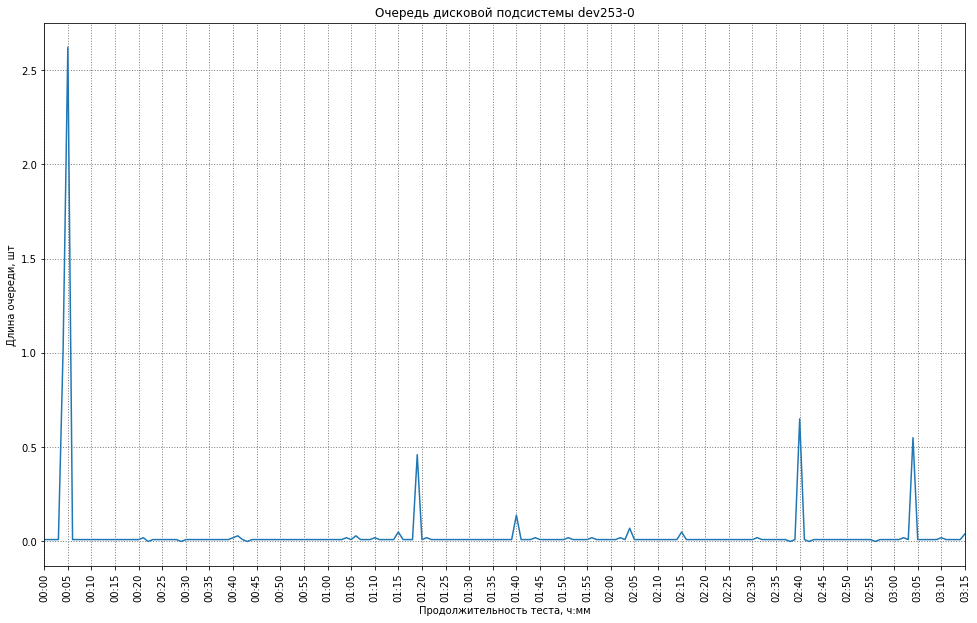

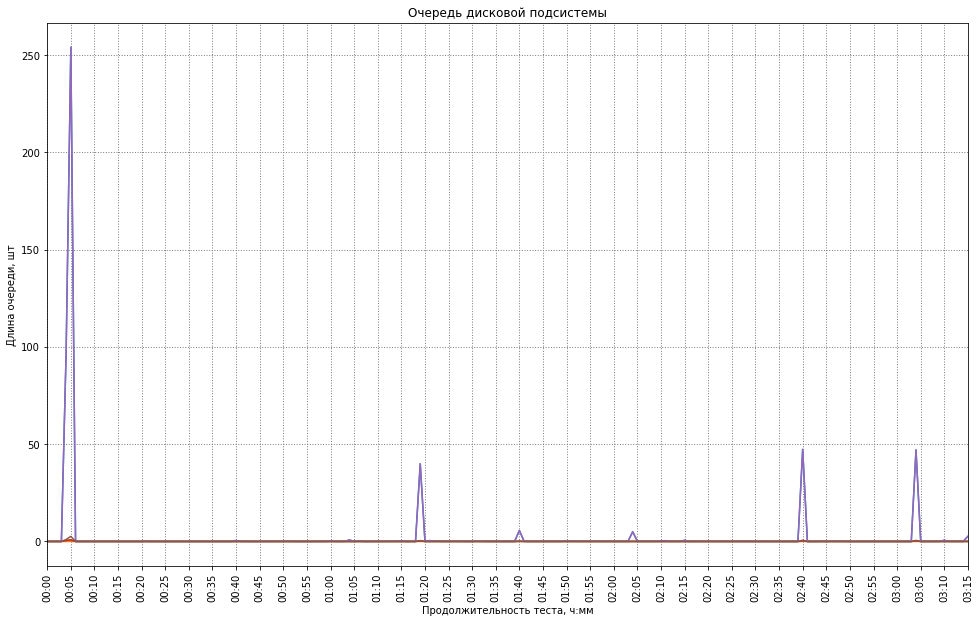

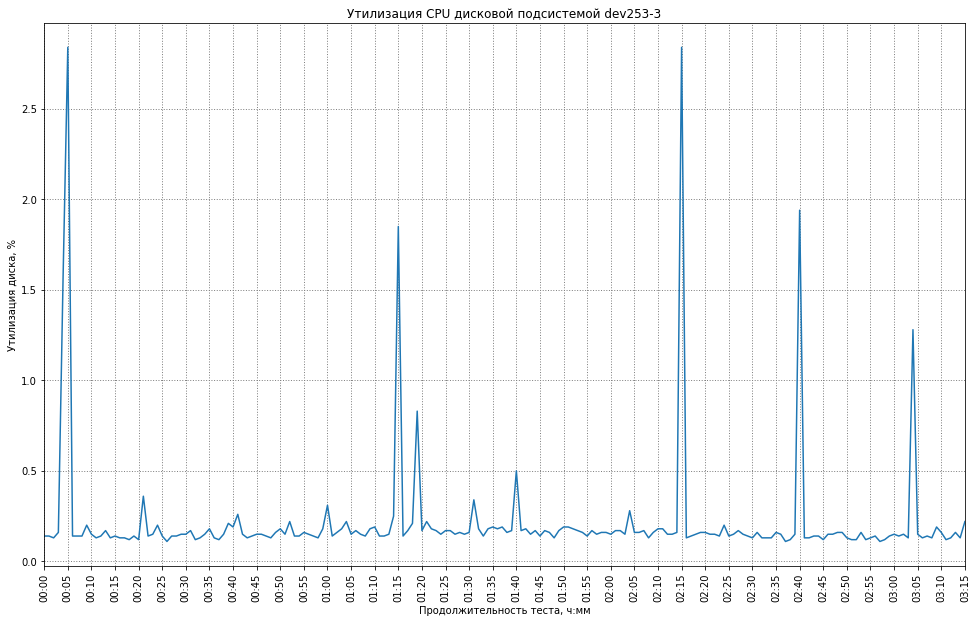

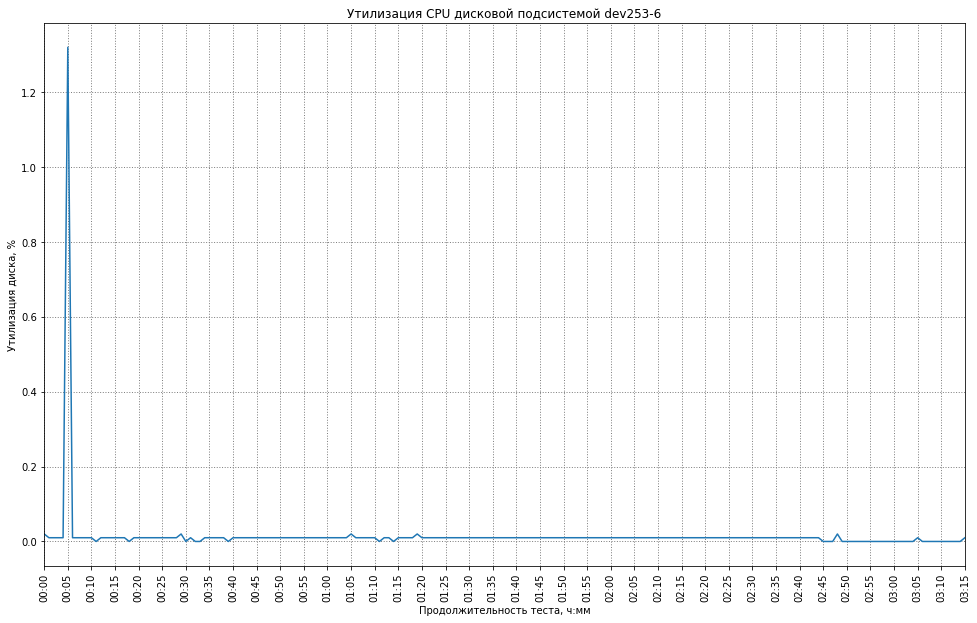

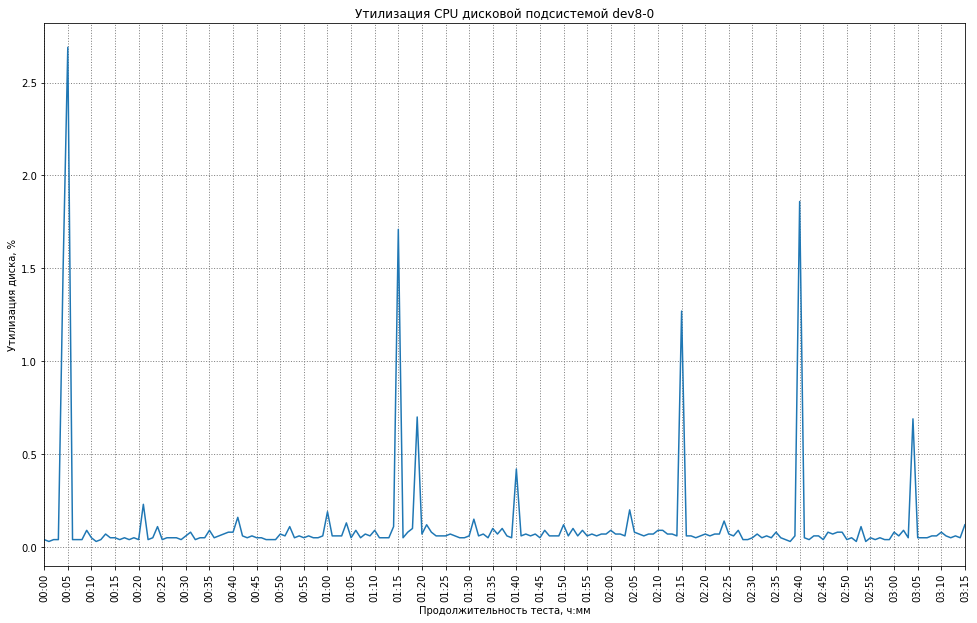

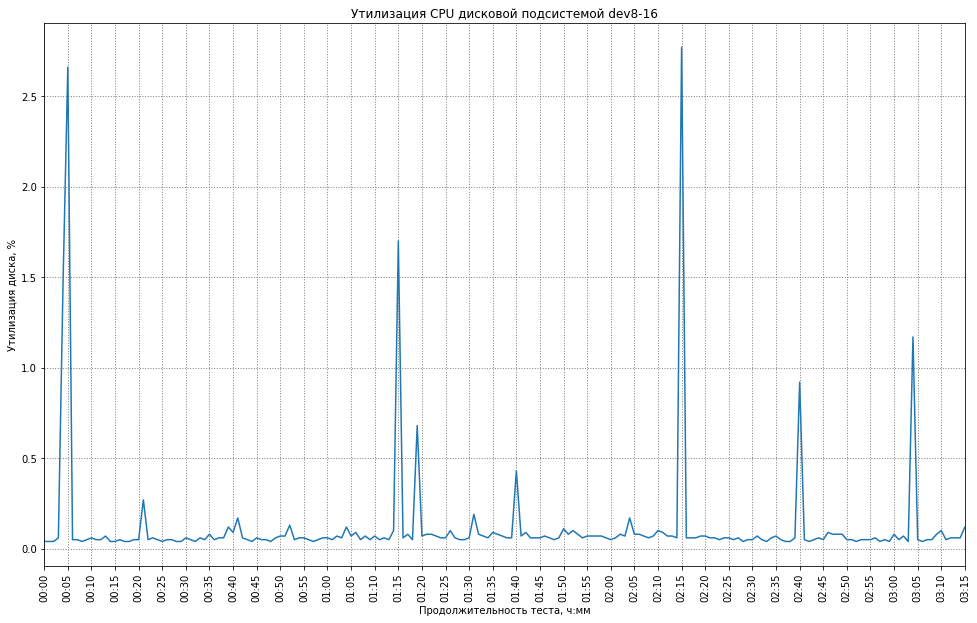

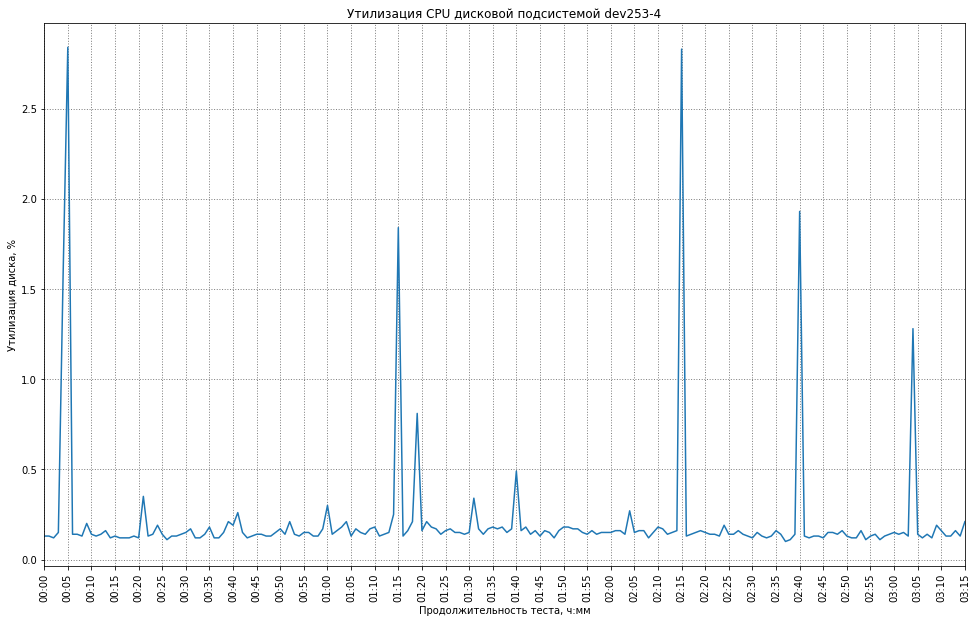

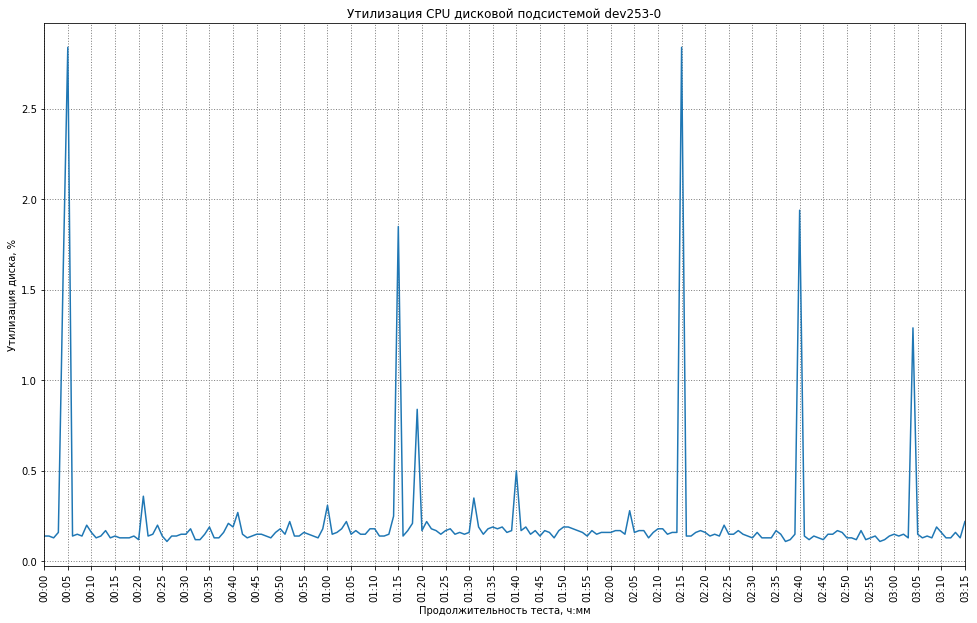

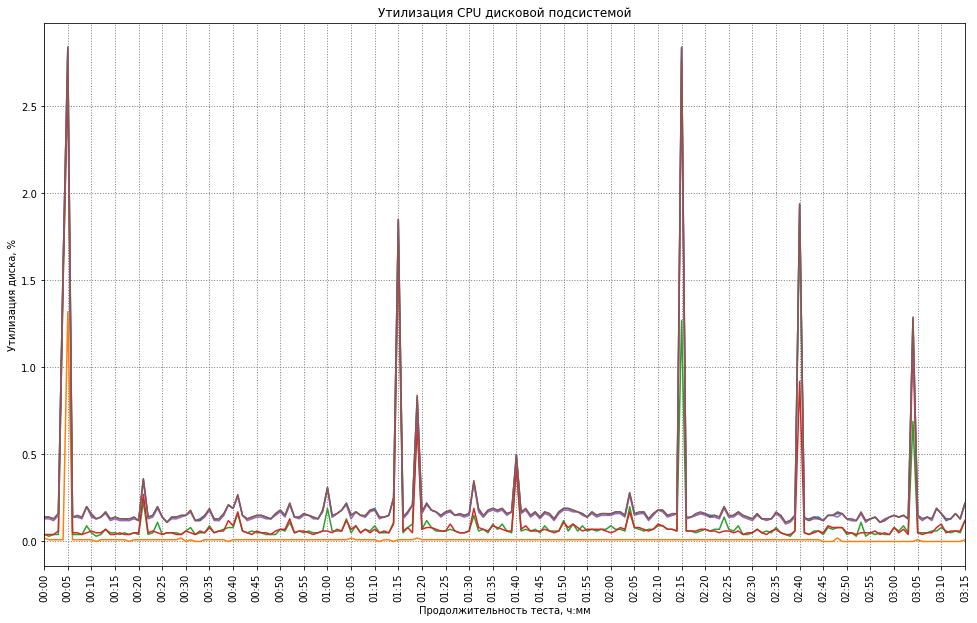

In [ ]:
count_1 = 0
count_2 = 0
for i in dataList:
    for j in i[0]:
        if j == 'await':
            columnAwaitDisk = count_2
            tableDisk = count_1
        elif j == 'svctm':
            columnSvctmDisk = count_2
        elif j == 'avgqu-sz':
            columnAvgquDisk = count_2
        elif j == '%util':
            columnUtilDisk = count_2
        count_2 += 1
    count_1 += 1
    count_2 = 0

devices = set()
    
count_1 = 0
for i in dataList[tableDisk][0]:
    if i == 'DEV':
        columnDevice = count_1
    count_1 += 1
    
for i in dataList[tableDisk]:    
    if i[columnDevice] != 'DEV':
        devices.add(i[columnDevice])


dataAwaitDiskGrid = dict()
dataSvctmDiskGrid = dict()
dataAvgquDiskGrid = dict()
dataUtilDiskGrid = dict()

for i in devices:
    dataAwaitDiskGrid[i] = []
    dataSvctmDiskGrid[i] = []
    dataAvgquDiskGrid[i] = []
    dataUtilDiskGrid[i] = []    
    for j in dataList[tableDisk]:
        if j[columnDevice] == i:
            dataAwaitDiskGrid[i].append(float(j[columnAwaitDisk]))
            dataSvctmDiskGrid[i].append(float(j[columnSvctmDisk]))
            dataAvgquDiskGrid[i].append(float(j[columnAvgquDisk]))
            dataUtilDiskGrid[i].append(float(j[columnUtilDisk]))

nonEmpty_devices = []
for i in devices:
    if sum(dataAwaitDiskGrid[i]) != 0 or sum(dataSvctmDiskGrid[i]) != 0:
        nonEmpty_devices.append(i)

for i in nonEmpty_devices:
    fig = plt.figure(figsize=(16.5,10))  
    axes = fig.add_subplot(111)
    axes.set_title(u'Среднее время чтения/записи ' + i)   
    axes.plot(dates, dataAwaitDiskGrid[i])
    axes.plot(dates, dataSvctmDiskGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Время, мс')
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

    fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
    plt.xticks(filter_dates, rotation=90)
    plt.savefig(i + '_rw.png', format = 'png')
    
fig = plt.figure(figsize=(16.5,10))  
axes = fig.add_subplot(111)
axes.set_title(u'Среднее время чтения/записи')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.xticks(filter_dates, rotation=90)
for i in nonEmpty_devices:
    axes.plot(dates, dataAwaitDiskGrid[i])
    axes.plot(dates, dataSvctmDiskGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Время, мс')
plt.savefig('overall_rw.png', format = 'png')

nonEmpty_devices = []
for i in devices:
    if sum(dataAvgquDiskGrid[i]) != 0:
        nonEmpty_devices.append(i)
        
for i in nonEmpty_devices:
    fig = plt.figure(figsize=(16.5,10))  
    axes = fig.add_subplot(111)
    axes.set_title(u'Очередь дисковой подсистемы ' + i)   
    axes.plot(dates, dataAvgquDiskGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Длина очереди, шт')
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

    fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
    plt.xticks(filter_dates, rotation=90)
    plt.savefig(i + '_queue.png', format = 'png')
    
fig = plt.figure(figsize=(16.5,10))  
axes = fig.add_subplot(111)
axes.set_title(u'Очередь дисковой подсистемы')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.xticks(filter_dates, rotation=90)
for i in nonEmpty_devices:
    axes.plot(dates, dataAvgquDiskGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Длина очереди, шт')
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

plt.savefig('overall_queue.png', format = 'png')

nonEmpty_devices = []
for i in devices:
    if sum(dataUtilDiskGrid[i]) != 0:
        nonEmpty_devices.append(i)

for i in nonEmpty_devices:
    fig = plt.figure(figsize=(16.5,10))  
    axes = fig.add_subplot(111)
    axes.set_title(u'Утилизация CPU дисковой подсистемой ' + i)   
    axes.plot(dates, dataUtilDiskGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Утилизация диска, %')
    axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

    fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
    plt.xticks(filter_dates, rotation=90)
    plt.savefig(i + '_diskutil.png', format = 'png')
    
fig = plt.figure(figsize=(16.5,10))  
axes = fig.add_subplot(111)
axes.grid(color='gray', linewidth=1, linestyle=':')  # параметры сетки

axes.set_title(u'Утилизация CPU дисковой подсистемой')
fig.gca().xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
plt.xticks(filter_dates, rotation=90)
for i in nonEmpty_devices:
    axes.plot(dates, dataUtilDiskGrid[i])
    axes.set_xlim(min(dates),max(dates))
    axes.set_xlabel(u'Продолжительность теста, ч:мм')
    axes.set_ylabel(u'Утилизация диска, %')
plt.savefig('overall_diskutil.png', format = 'png')